In [1]:
import pandas as pd    ##data handling
import numpy          ##numerical python  in mathematical calc
from sklearn import svm      ## proving us regarding algorithm
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('data_arrhythmia.csv')

In [4]:
data.head()

,Age,Sex,Height,Weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [5]:
data["diagnosis"].unique()

array([ 8,  6, 10,  1,  7, 14,  3, 16,  2,  4,  5,  9, 15], dtype=int64)

In [6]:
len(data["diagnosis"].unique())

13

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Columns: 280 entries, Age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 2.9 MB


In [8]:
data.describe()

,Age,Sex,Height,Weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,...,1356.000000,1356.000000,1356.000000,1356.000000,1356.0,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.454474,0.497587,37.142898,16.578554,15.353051,44.809176,33.360774,35.606765,25.807576,45.397893,...,0.548471,3.470298,2.000951,0.050081,0.0,0.347274,1.424999,13.493952,18.480273,4.403843
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# PRE PROCESSING DATA (Removing Missing & NaN values)

In [9]:
data = data.fillna(data.mean())

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Columns: 280 entries, Age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 2.9 MB


In [11]:
data.isnull().sum()

Age             0
Sex             0
Height          0
Weight          0
qrs_duration    0
               ..
LD              0
LE              0
LF              0
LG              0
diagnosis       0
Length: 280, dtype: int64

In [12]:
X = data.iloc[:,:-1]
X=numpy.array(X)
X=X.astype(numpy.float)

y = data.iloc[:,-1]
y=numpy.array(y)
y=y.astype(numpy.int)


C:\Users\vasug\AppData\Local\Temp\ipykernel_23628\2269076309.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X=X.astype(numpy.float)
C:\Users\vasug\AppData\Local\Temp\ipykernel_23628\2269076309.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.

# applying random forests to get pricipal attributes

In [14]:
x = pd.read_csv('reduced_features.csv')

In [15]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y[:-1],test_size=0.2,random_state=100)

# KNN classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=13)

clf_KNN.fit(X_train,y_train)    ## fit ===> Training

KNeighborsClassifier(n_neighbors=13)

In [17]:
y_pred_knn  = clf_KNN.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_knn,y_test))
score_knn = accuracy_score(y_pred_knn,y_test)

0.5350553505535055


# SVM classifier 

In [19]:
clf_SVM = svm.SVC(C=1,kernel="linear")
clf_SVM.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [20]:
y_pred_svm  = clf_SVM.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_svm,y_test))
score_svm = accuracy_score(y_pred_svm,y_test)

0.955719557195572


# Logistic Regression

In [22]:

clf_LR = LogisticRegression(max_iter=100,C=1)
clf_LR.fit(X_train,y_train)

c:\users\vasug\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [23]:
y_pred_LR  = clf_LR.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_LR,y_test))
score_lr = accuracy_score(y_pred_LR,y_test)

0.5461254612546126


# Navie Bayes 

In [25]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred_NB = clf_NB.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_NB,y_test))
score_nb = accuracy_score(y_pred_NB,y_test)

0.13653136531365315


# Weigth KNN 

In [28]:
from sklearn.neighbors import KNeighborsClassifier
clf_WKNN = KNeighborsClassifier(n_neighbors=13,weights='distance')
clf_WKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [29]:
y_pred_WKNN = clf_WKNN.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_WKNN,y_test))
score_wknn = accuracy_score(y_pred_WKNN,y_test)

import pickle
with open('wknn_check.pkl', 'wb') as file:
   pickle.dump(clf_WKNN,file)


0.977859778597786


In [31]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
scores = [score_knn,score_svm,score_lr,score_nb,score_wknn]
algorithms = ["KNN","Support Vector Machine","Logistic regression","naviebayes","Weigthed - knn"]    

for i in range(len(algorithms)):
    print(f"Theaccuracy score achieved using {algorithms[i]} is: {scores[i]*100:.2f} %")

Theaccuracy score achieved using KNN is: 53.51 %
Theaccuracy score achieved using Support Vector Machine is: 95.57 %
Theaccuracy score achieved using Logistic regression is: 54.61 %
Theaccuracy score achieved using naviebayes is: 13.65 %
Theaccuracy score achieved using Weigthed - knn is: 97.79 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

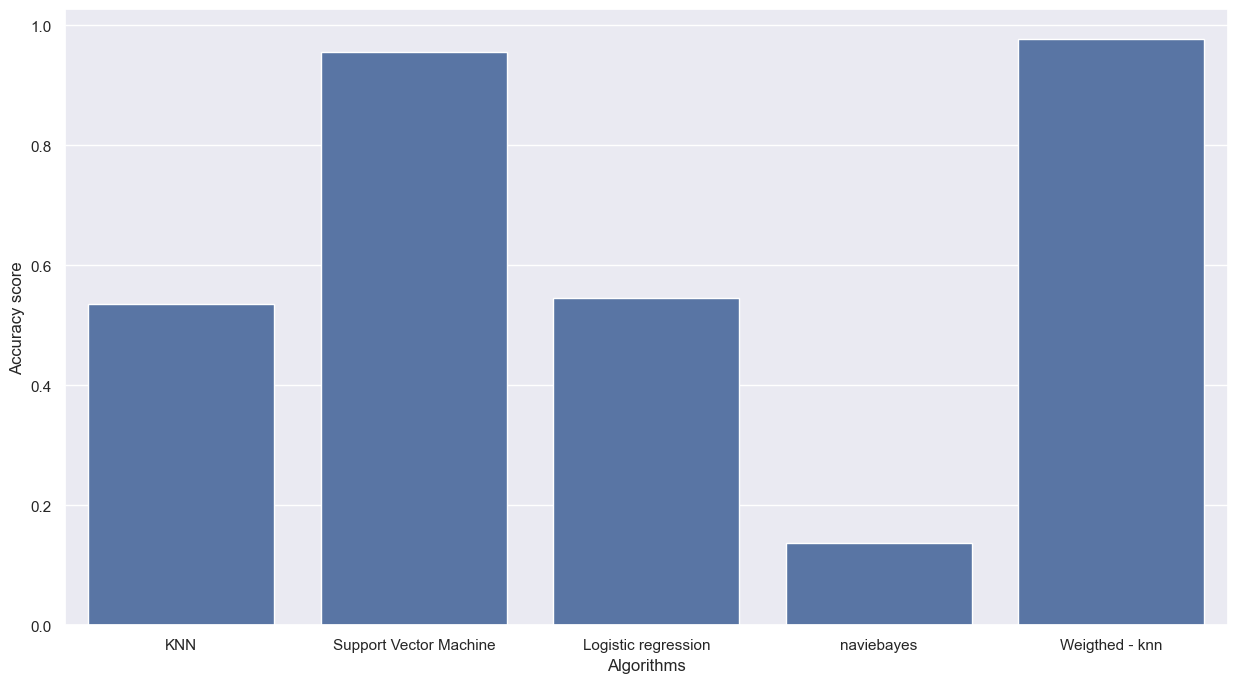

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=scores)